# Cancer

In [5]:
import pandas as pd

In [7]:
# Download the dataset
cancer = pd.read_csv("https://myslu.stlawu.edu/~ltorrey/ml/Cancer.csv")
cancer

,radius,texture,perimeter,area,smoothness,compactness,concavity,points,symmetry,diagnosis
0,17.99,1001.0,0.30010,0.07871,8.589,0.04904,0.03003,17.33,0.16220,M
1,20.57,1326.0,0.08690,0.05667,3.398,0.01308,0.01389,23.41,0.12380,M
2,19.69,1203.0,0.19740,0.05999,4.585,0.04006,0.02250,25.53,0.14440,M
3,11.42,386.1,0.24140,0.09744,3.445,0.07458,0.05963,26.50,0.20980,M
4,20.29,1297.0,0.19800,0.05883,5.438,0.02461,0.01756,16.67,0.13740,M
...,...,...,...,...,...,...,...,...,...,...
564,21.56,1479.0,0.24390,0.05623,7.673,0.02891,0.01114,26.40,0.14100,M
565,20.13,1261.0,0.14400,0.05533,5.203,0.02423,0.01898,38.25,0.11660,M
566,16.60,858.1,0.09251,0.05648,3.425,0.03731,0.01318,34.12,0.11390,M
567,20.60,1265.0,0.35140,0.07016,5.772,0.06158,0.02324,39.42,0.16500,M


In [ ]:
# Separate features and target
x = cancer.drop("diagnosis", axis=1)
y = cancer["diagnosis"]

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [ ]:
# Baseline Strat
tree = DecisionTreeClassifier()
cross_val_score(tree,x,y).mean()

0.9262692128551467

In [ ]:
# Settings to try
hyperparameters = {
    "max_depth":range(1,16),
    "min_samples_leaf": range(1,10)
}
final_tree = GridSearchCV(tree,hyperparameters).fit(x,y)
final_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2}

In [ ]:
# Tuned accuracy
tuned_tree = GridSearchCV(tree, hyperparameters)
cross_val_score(tuned_tree,x,y).mean()

0.9279925477410339

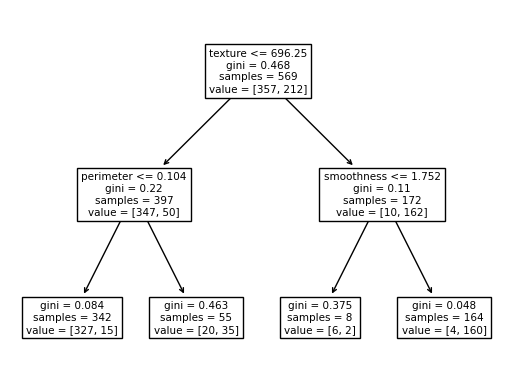

In [ ]:
# Diagram of a smaller tree
small_tree = DecisionTreeClassifier(max_depth=2).fit(x,y)
plot = plot_tree(small_tree,feature_names=x.columns)

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
# baseline accuracy
forest = RandomForestClassifier()
cross_val_score(forest,x,y).mean()

0.9490607048594939

In [ ]:
# Check if number of trees is big enough
for i in [2,4,8,16,32,64,128,256]:
  clf = RandomForestClassifier(n_estimators = i)
  print(i,cross_val_score(clf,x,y).mean())

2 0.9156963204471357
4 0.9384722869119703
8 0.9420431609998449
16 0.9455364073901567
32 0.9543238627542309
64 0.9525694767893185
128 0.9543238627542306
256 0.9508150908244062


In [ ]:
# check the number of features
for i in range(1,10):
  clf = RandomForestClassifier(max_features=i)
  print(i,cross_val_score(clf,x,y).mean())

1 0.9525694767893185
2 0.9578326346840551
3 0.956078248719143
4 0.9525694767893185
5 0.9508306163639186
6 0.9525694767893185
7 0.9490451793199813
8 0.9507995652848937
9 0.9508150908244062


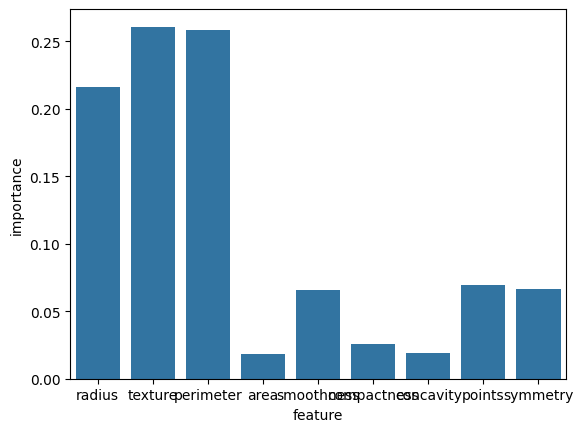

In [ ]:
final_forest = RandomForestClassifier().fit(x,y)
importance = pd.DataFrame({"feature":x.columns, "importance": final_forest.feature_importances_})
plot = sns.barplot(data = importance, x = "feature", y = "importance")

# Boosting ensemble

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Baseline for boosting ensemble
ensemble = HistGradientBoostingClassifier()
cross_val_score(ensemble,x,y).mean()

0.9683434249340165

In [ ]:
# Tuning boosting ensemble
hyperparameters = {
    "max_iter":[100,200,300,400],
    "max_depth":range(1,15),
    "min_samples_leaf":range(1,10)
}

tuned_ensemble = RandomizedSearchCV(ensemble,hyperparameters)
cross_val_score(tuned_ensemble,x,y).mean()

0.964834653004192